In [374]:
import sys
sys.path.append('../')
from wick_option import *
import matplotlib.pyplot as plt
%autoreload 2

In [450]:
w=wick(n=3,depth=3,terminal_time=1,stock_start=0.5,stock_end=50,num_time_steps=10)

Calculating Aij circuits
Done
Calculating Cik circuits
Done


In [451]:
w.get_initial_angles(method="SLSQP",tol=1e-12,maxiter=2000)
print("Initial closeness",w.initial_closeness)

Initial closeness 1.1546319456101628e-14


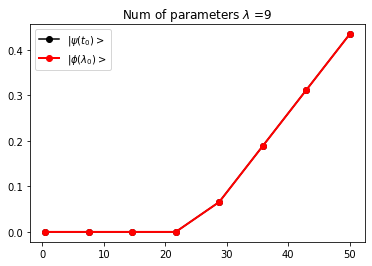

In [452]:
state=w.get_final_state(w.angles[0])


fig,ax=plt.subplots()
ax.plot(w.s,w.initial*w.initial.conj(),c="k",label="$|\psi(t_0)>$",marker="o")
ax.plot(w.s,state*state.conj(),c="r",label="$|\phi(\lambda_0)>$",lw=2,marker="o")
ax.set_title(f"Num of parameters $\lambda$ ={w.num_parameters}")
ax.legend()
plt.show()

In [453]:
w.evolve_system(verbose=False)

100%|██████████| 10/10 [02:50<00:00, 17.09s/it]


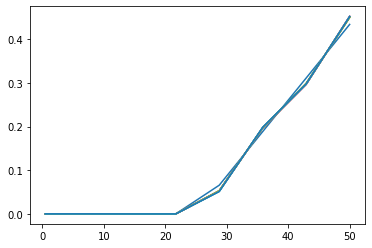

In [433]:
for i in w.u.T:
    plt.plot(w.s,i*i.conj())

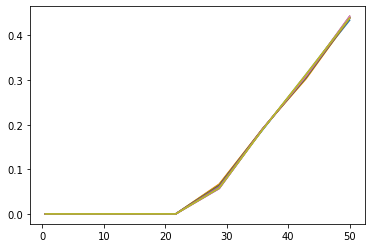

In [456]:
for i in w.u.T[:9]:
    plt.plot(w.s,i*i.conj())

In [353]:
angles = w.angles[0]
verbose=False
if verbose:
    iter_range = tqdm(range(w.num_parameters))
else:
    iter_range = range(w.num_parameters)
A = np.zeros((w.num_parameters, w.num_parameters))
for i in iter_range:
    for j in range(w.num_parameters):
        # if j <= i:
        state, p = w.get_final_state_lm(angles, [j, i])
        # A[i, j] = p['0']-p['1']  # 2*p['1']-1
        A[j, i] = 2*p['0']-1

C = np.zeros((w.num_parameters, w.num_ham_terms))
for i in iter_range:
    for j in range(w.num_ham_terms):
        state, p = w.get_final_state_ik(angles, [i, j])
        # 2*p['1']-1  # p['0']-p['1']  # 2*p['0']-1
        # C[i, j] = p['0']-p['1']
        C[i, j] = 2*p['0']-1
print("Done")

Done


In [278]:
try:
    theta_dot = np.linalg.solve(A, C.sum(axis=1))
except:
    print("diag did not work, going with lstq")
    theta_dot, residuals, rank, s = np.linalg.lstsq(
        A, C.sum(axis=1))
# w.angles[ntime+1] = (angles+w.dt*theta_dot)
# state = w.get_final_state(w.angles[ntime+1])
# w.u[:, ntime+1] = state

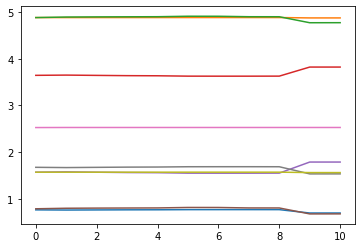

In [457]:
for i in w.angles.T:
    plt.plot(i)

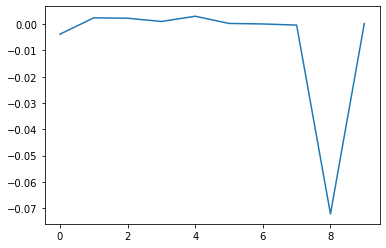

In [461]:
plt.plot(np.diff(w.angles.T[0]))